In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
# nltk.download('stopwords')
# nltk.download('punkt_tab')


In [2]:
tweets_df = pd.read_csv('../Datasets/filtered_data.csv')
tweets_df.head()

,tweets,language
0,Monkey pox,en
1,Of course because a new scam is here the monke...,en
2,Monkeypox can be virtually avoided by less ran...,en
3,An event is not how monkey pox is spread Just ...,en
4,To all of you out there dont ask the source Iv...,en


In [3]:
tweets_df.shape

(83438, 2)

In [4]:
tweets_df.dropna(inplace = True)

In [5]:
import emoji

In [6]:
def remove_emojis(text):
    if not isinstance(text,str):
        return text
    return emoji.replace_emoji(text,replace='')

In [7]:
cleaned_tweets = tweets_df['tweets'].apply(remove_emojis)


In [8]:
removed_emojis_tweet = pd.DataFrame({'tweets' : cleaned_tweets})
removed_emojis_tweet.head()

,tweets
0,Monkey pox
1,Of course because a new scam is here the monke...
2,Monkeypox can be virtually avoided by less ran...
3,An event is not how monkey pox is spread Just ...
4,To all of you out there dont ask the source Iv...


In [9]:
stop_words = set(stopwords.words('english'))
tweets = removed_emojis_tweet['tweets']
filtered_tweets = []

for t in tweets:
    if isinstance(t,str):
        word_tokens = word_tokenize(t)
        filtered_words = [word for word in word_tokens if word.lower() not in stop_words]  # Remove stop words
        filtered_tweets.append(" ".join(filtered_words))
    else:
        filtered_tweets.append(t)

In [10]:
filtered_tweets[0:10]

['Monkey pox',
 'course new scam monkey pox',
 'Monkeypox virtually avoided less random gay sex compassion',
 'event monkey pox spread dont sex man man',
 'dont ask source Ive got bad feeling trying get nail AIDS Monkeypox',
 'name rhymed monkeypoxgranting hogs puddinglike doctor Id great idea song',
 'Covid monkeypox world spiraling toilet',
 'Rt got monkey pox vaccine',
 'Ground Zero monkeypox epidemic',
 'need concerned abt brainrot monkeypox shit type stupidity frightening']

In [11]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
lemmatizer = WordNetLemmatizer()
lemmatized_tweets = []

for tweet in filtered_tweets:
    if isinstance(tweet,str):
        tokens = word_tokenize(tweet)
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        lemmatized_tweets.append(" ".join(lemmatized_tokens))
    else:
        lemmatized_tweets.append(tweet)

In [14]:
lemmatized_tweets[0:10]

['Monkey pox',
 'course new scam monkey pox',
 'Monkeypox virtually avoided less random gay sex compassion',
 'event monkey pox spread dont sex man man',
 'dont ask source Ive got bad feeling trying get nail AIDS Monkeypox',
 'name rhymed monkeypoxgranting hog puddinglike doctor Id great idea song',
 'Covid monkeypox world spiraling toilet',
 'Rt got monkey pox vaccine',
 'Ground Zero monkeypox epidemic',
 'need concerned abt brainrot monkeypox shit type stupidity frightening']

In [15]:
# performing stemming 
stemmer = PorterStemmer()
stemmed_tweets = []
for tweet in filtered_tweets:
    if isinstance(tweet,str):
        tokens = word_tokenize(tweet)
        stemmed_tokens = [stemmer.stem(token) for token in tokens]
        stemmed_tweets.append(" ".join(stemmed_tokens))
    else:
        stemmed_tweets.append(tweet)

In [16]:
stemmed_tweets[0:10]

['monkey pox',
 'cours new scam monkey pox',
 'monkeypox virtual avoid less random gay sex compass',
 'event monkey pox spread dont sex man man',
 'dont ask sourc ive got bad feel tri get nail aid monkeypox',
 'name rhyme monkeypoxgr hog puddinglik doctor id great idea song',
 'covid monkeypox world spiral toilet',
 'rt got monkey pox vaccin',
 'ground zero monkeypox epidem',
 'need concern abt brainrot monkeypox shit type stupid frighten']

In [ ]:
!pip install textblob

In [17]:
process_data = pd.DataFrame({'tweets' : filtered_tweets, 'lemmatized_tweets' : lemmatized_tweets})
process_data

,tweets,lemmatized_tweets
0,Monkey pox,Monkey pox
1,course new scam monkey pox,course new scam monkey pox
2,Monkeypox virtually avoided less random gay se...,Monkeypox virtually avoided less random gay se...
3,event monkey pox spread dont sex man man,event monkey pox spread dont sex man man
4,dont ask source Ive got bad feeling trying get...,dont ask source Ive got bad feeling trying get...
...,...,...
82886,truly sexual transmission children Monkeypox C...,truly sexual transmission child Monkeypox Chec...
82887,vaccines finally available Recently BlaqOut CE...,vaccine finally available Recently BlaqOut CEO...
82888,Starting hour pm Sign join conversation hMPXV ...,Starting hour pm Sign join conversation hMPXV ...
82889,uptick monkeypox cases Dr Thomas Giordano prov...,uptick monkeypox case Dr Thomas Giordano provi...


In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
sia = SentimentIntensityAnalyzer()

In [55]:
def get_vader_sentiment(text):
    if not isinstance(text, str):
        return 0
    scores = sia.polarity_scores(text)
    # print("Scores: ",scores)
    compound = scores['compound']
    if compound > 0.0:
        return 1
    elif compound <= 0.0:
        return -1

In [56]:
def get_textblob_sentiment(text):
    if not isinstance(text, str):
        return 0
    polarity = TextBlob(text).sentiment.polarity
    # print("polarity: ", polarity)
    if polarity >= 0:
        return 1
    elif polarity < 0:
        return -1

In [57]:
process_data['vader_sentiment'] = process_data['lemmatized_tweets'].apply(get_vader_sentiment)
process_data['textblob_sentiment'] = process_data['lemmatized_tweets'].apply(get_textblob_sentiment)

In [58]:
process_data

,tweets,lemmatized_tweets,vader_sentiment,textblob_sentiment
0,Monkey pox,Monkey pox,-1,-1
1,course new scam monkey pox,course new scam monkey pox,-1,1
2,Monkeypox virtually avoided less random gay se...,Monkeypox virtually avoided less random gay se...,1,-1
3,event monkey pox spread dont sex man man,event monkey pox spread dont sex man man,-1,-1
4,dont ask source Ive got bad feeling trying get...,dont ask source Ive got bad feeling trying get...,-1,-1
...,...,...,...,...
82886,truly sexual transmission children Monkeypox C...,truly sexual transmission child Monkeypox Chec...,1,1
82887,vaccines finally available Recently BlaqOut CE...,vaccine finally available Recently BlaqOut CEO...,1,1
82888,Starting hour pm Sign join conversation hMPXV ...,Starting hour pm Sign join conversation hMPXV ...,1,1
82889,uptick monkeypox cases Dr Thomas Giordano prov...,uptick monkeypox case Dr Thomas Giordano provi...,1,1


In [59]:
def analyze_sentiment(tweet):
    if not isinstance(tweet,str):
        return None, None, None
    vader_scores = sia.polarity_scores(tweet)
    vader_compound = vader_scores['compound']

    blob = TextBlob(tweet)
    textblob_polarity = blob.sentiment.polarity
    textblob_subjectivity = blob.sentiment.subjectivity

    return vader_compound, textblob_polarity,textblob_subjectivity

In [60]:
process_data[['vader_compound', 'textblob_polarity', 'textblob_subjectivity']] = process_data['lemmatized_tweets'].apply(lambda x: analyze_sentiment(x)).apply(pd.Series)
process_data.head()

,tweets,lemmatized_tweets,vader_sentiment,textblob_sentiment,vader_compound,textblob_polarity,textblob_subjectivity
0,Monkey pox,Monkey pox,-1,-1,0.0000,-0.050000,0.000000
1,course new scam monkey pox,course new scam monkey pox,-1,1,-0.5719,0.043182,0.227273
2,Monkeypox virtually avoided less random gay se...,Monkeypox virtually avoided less random gay se...,1,-1,0.1531,-0.083333,0.383333
3,event monkey pox spread dont sex man man,event monkey pox spread dont sex man man,-1,-1,0.0000,-0.050000,0.000000
4,dont ask source Ive got bad feeling trying get...,dont ask source Ive got bad feeling trying get...,-1,-1,-0.4588,-0.700000,0.666667


In [61]:
def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score <= 0:
        return 'Negative'

In [62]:
process_data['sentiment'] = process_data['vader_compound'].apply(get_sentiment_label)
process_data.head()

,tweets,lemmatized_tweets,vader_sentiment,textblob_sentiment,vader_compound,textblob_polarity,textblob_subjectivity,sentiment
0,Monkey pox,Monkey pox,-1,-1,0.0000,-0.050000,0.000000,Negative
1,course new scam monkey pox,course new scam monkey pox,-1,1,-0.5719,0.043182,0.227273,Negative
2,Monkeypox virtually avoided less random gay se...,Monkeypox virtually avoided less random gay se...,1,-1,0.1531,-0.083333,0.383333,Positive
3,event monkey pox spread dont sex man man,event monkey pox spread dont sex man man,-1,-1,0.0000,-0.050000,0.000000,Negative
4,dont ask source Ive got bad feeling trying get...,dont ask source Ive got bad feeling trying get...,-1,-1,-0.4588,-0.700000,0.666667,Negative


C:\Users\samra\AppData\Local\Temp\ipykernel_12680\1249894093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'sentiment', data = process_data, palette = "viridis")


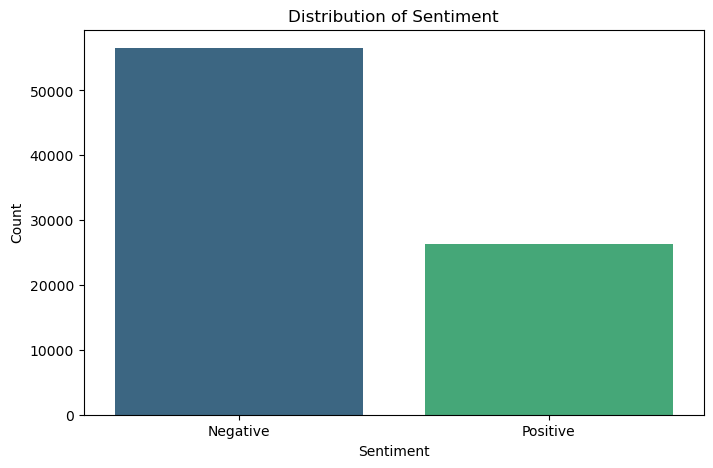

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'sentiment', data = process_data, palette = "viridis")
plt.title("Distribution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


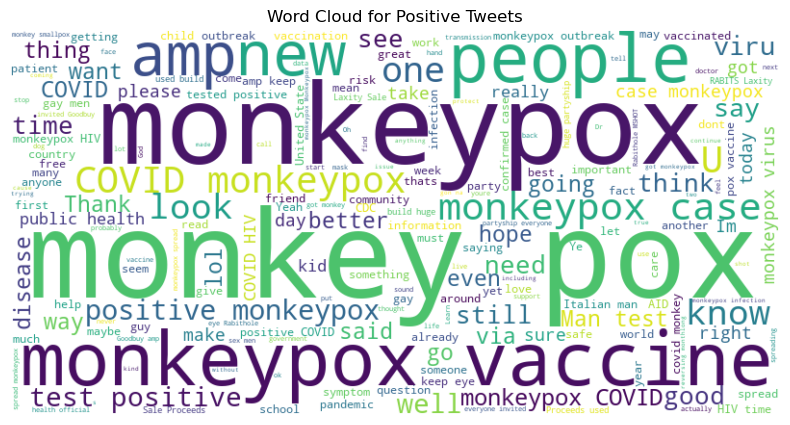

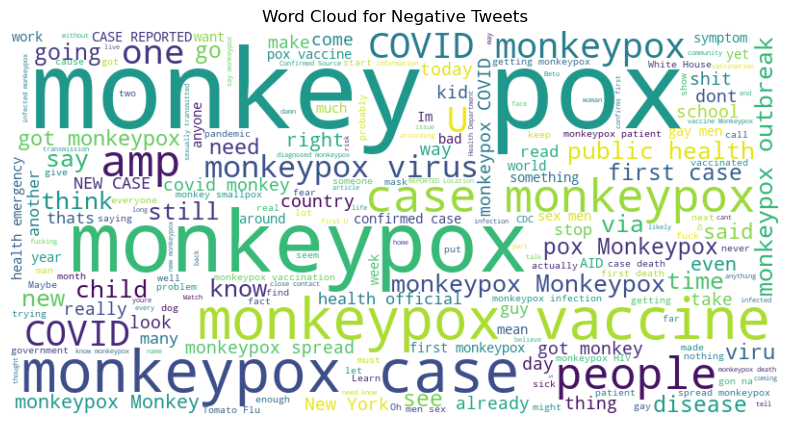

In [64]:
def generate_wordcloud(sentiment_label):
    text = " ".join(process_data[process_data['sentiment'] == sentiment_label]['lemmatized_tweets'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment_label} Tweets")
    plt.show()

# Generate word clouds for positive, negative tweets
for sentiment in ['Positive', 'Negative']:
    generate_wordcloud(sentiment)

In [65]:
process_data.to_csv('sentiment_results.csv',index = False)

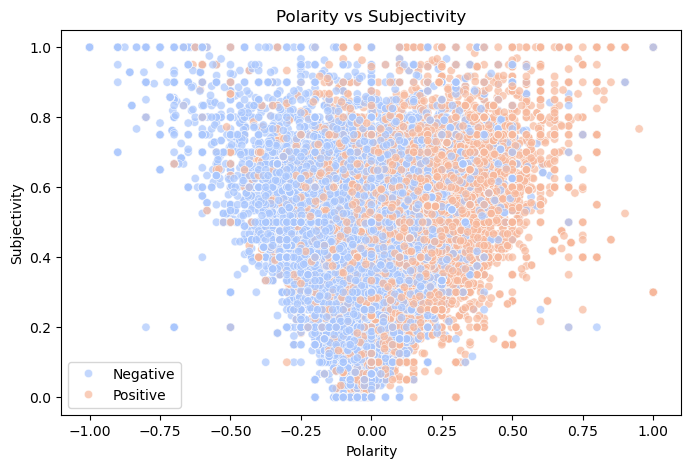

In [66]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='textblob_polarity', y='textblob_subjectivity', data=process_data, hue='sentiment', alpha=0.7, palette="coolwarm")
plt.title("Polarity vs Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.legend()
plt.show()